In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120

from scipy.stats import skew
from scipy.stats import kurtosis

In [23]:
tf=100
dt=0.01
N  = round(tf/dt)
t = np.arange(0,tf,dt)

# Dataset

In [32]:
# NBFL-1 vs IFFL-1
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

#     k1 = 1;
#     k2 = 1;
#     k3 = 0.1;
#     k4 = 0.1;
    k1,k2 = np.random.uniform(low=0.9, high=1.1, size=(2,))
    k3,k4 = np.random.uniform(low=0.09, high=0.11, size=(2,))
    sgma = 0;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #NBFL-1
    for j in range(N-1):
      k1x = -k1*x[j]-k2*y[j]+A;
      k1y = k3*x[j]-k4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k1*ax-k2*ay+A;
      k2y = k3*ax-k4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
    lbs.append(0)

    B = k1+k4
    C = k1*k4 + k2*k3
    Q = k4*A

    sgma=0.1
    K1 = (B + np.sqrt(B**2-4*C)) / 2;
    K3 = 0;
    K4 = B-K1;
    K2 = (K4-k4)/sgma;

#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #IFFL-1
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -K1*x[j]-K2*y[j]+A;
      k1y = K3*x[j]-K4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K1*ax-K2*ay+A;
      k2y = K3*ax-K4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0); 
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
         
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])
    lbs.append(1)
    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.subplot(122)
#     plt.plot(t,y,'r--')


np.savetxt("linear_signal.dat",signal)
np.savetxt("linear_lbs.dat",lbs)

In [33]:
x

array([0.        , 0.00369247, 0.01273056, ..., 0.39823775, 0.40257928,
       0.40443368])

In [5]:
# NBFL-1 vs NBFL-2
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

#     k1 = 1;
#     k2 = 1;
#     k3 = 0.1;
#     k4 = 0.1;
    k1,k2 = np.random.uniform(low=0.8, high=1.3, size=(2,))
    k3,k4 = np.random.uniform(low=0.08, high=0.13, size=(2,))
    sgma = 0;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #NBFL-1
    for j in range(N-1):
      k1x = -k1*x[j]-k2*y[j]*x[j]+A;
      k1y = k3*x[j]-k4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k1*ax-k2*ay*ax+A;
      k2y = k3*ax-k4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(0)

    #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #NBFL-2
    
    k_1 = k1;
    k_2 = 0.5;
    k_3 = k2*k3/k_2;
    k_4 = k4;
    
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -k_1*x[j]-k_2*y[j]*x[j]+A;
      k1y = k_3*x[j]-k_4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -k_1*ax-k_2*ay*ax+A;
      k2y = k_3*ax-k_4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(1)
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.subplot(122)
#     plt.plot(t,y,'r--')

# np.savetxt("nfbl_vs_nfbl_signal.dat",signal)
# np.savetxt("nfbl_vs_nfbl_lbs.dat",lbs)

# np.savetxt("nfbl_vs_nfbl_signal_y.dat",signal)
# np.savetxt("nfbl_vs_nfbl_lbs_y.dat",lbs)

np.savetxt("nfbl_vs_nfbl_signal_vars.dat",signal)
np.savetxt("nfbl_vs_nfbl_lbs_vars.dat",lbs)

In [6]:
# IFFL-1 vs IFFL-2
D=1e-3 #noise
trials=2000
lbs=[]
signal=[]
for i in range(trials):

    K1,K2 = np.random.uniform(low=0.3, high=0.7, size=(2,))
    K3 = 0;
    K4 = np.random.uniform(low=0.08, high=0.13, size=(1,))
    sgma = 0.05;
    A = 1;

    x = np.zeros(N)
    y = np.zeros(N)

    #IFFL-1
    for j in range(N-1):
      k1x = -K1*x[j]-K2*y[j]*x[j]+A;
      k1y = K3*x[j]-K4*y[j]+sgma*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K1*ax-K2*ay*ax+A;
      k2y = K3*ax-K4*ay+sgma*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);  
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(0)

    #xbar = roots([ k2*k3 k1*k4+k2*sgma*A -k4*A]);
    
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'k')
#     plt.ylim([0,2])
#     plt.subplot(122)
#     plt.plot(t,y,'k')

    #IFFL-2
    
    K_1 = K1;
    K_2 = 1.0;
    K_3 = K3;
    K_4 = K4;
    sgma_ = K2*sgma/K_2;
    
    x = np.zeros(N)
    y = np.zeros(N)

    for j in range(N-1):
      k1x = -K_1*x[j]-K_2*y[j]*x[j]+A;
      k1y = K_3*x[j]-K_4*y[j]+sgma_*A;
      ax = x[j]+k1x*dt;
      ay = y[j]+k1y*dt;
      k2x = -K_1*ax-K_2*ay*ax+A;
      k2y = K_3*ax-K_4*ay+sgma_*A;
      x[j+1] = x[j]+(k1x+k2x)*dt/2;
      x[j+1] += np.sqrt(2*D*dt)*np.random.normal(loc=0.0, scale=1.0);   
      y[j+1] = y[j]+(k1y+k2y)*dt/2;
        
    xp=max(x)
    x50=xp - (xp-x[-1])/2
    try:
        id_ss = np.where((np.diff(x)>-1e-4)==False)[0][-1]
    except:
        id_ss = np.where((np.diff(x)>0)==False)[0][-1]
        
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1]])
#     signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], y[2000]])
    signal.append([xp, t[np.argmax(x)], x[id_ss], t[id_ss], x50, t[x>x50][-1], np.var(x), skew(x), kurtosis(x)])

    lbs.append(1)
#     plt.figure(1)
#     plt.subplot(121)
#     plt.plot(t,x,'r--')
#     plt.ylim([0,2])
#     plt.subplot(122)
#     plt.plot(t,y,'r--')

# np.savetxt("iffl_vs_iffl_signal.dat",signal)
# np.savetxt("iffl_vs_iffl_lbs.dat",lbs)

# np.savetxt("iffl_vs_iffl_signal_y.dat",signal)
# np.savetxt("iffl_vs_iffl_lbs_y.dat",lbs)

np.savetxt("iffl_vs_iffl_signal_vars.dat",signal)
np.savetxt("iffl_vs_iffl_lbs_vars.dat",lbs)

0.3201037696522492

(0.0, 2.0)

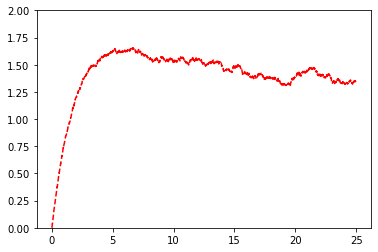

In [58]:
plt.plot(t,x,'r--')
plt.ylim([0,2])